In [1]:
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil
import cv2 as cv
import seaborn as sns

from util_plots2 import *
# sns.set_style('whitegrid')
# sns.set_color_codes('bright')


In [17]:
df = pd.read_csv('../train.csv')

# count_patients = df.patient_id.unique().size

print("Columns:", df.columns)
print("Number of samples:", len(df))
print("Number of samples with cancer:", len(df[df["cancer"]==1]))
print("Number of samples with no cancer:", len(df[df["cancer"]==0]))
# print("Number of patients:", count_patients)

#laterality = left or right
# density = A rating for how dense the breast tissue is,
#           A being the least dense and D being the most dense. Extremely dense tissue can make diagnosis more difficult. 


Columns: Index(['site_id', 'patient_id', 'image_id', 'laterality', 'view', 'age',
       'cancer', 'biopsy', 'invasive', 'BIRADS', 'implant', 'density',
       'machine_id', 'difficult_negative_case'],
      dtype='object')
Number of samples: 54706
Number of samples with cancer: 1158
Number of samples with no cancer: 53548


In [58]:
df_noimp_abc = df[(df["implant"] == 0) & (df["density"] != "D")]
print(len(df_noimp_abc))

df_noimp_abc_1 = df_noimp_abc[df_noimp_abc["cancer"]== 1]
df_noimp_abc_0 = df_noimp_abc[df_noimp_abc["cancer"]== 0]

print(len(df_noimp_abc_0))
print(len(df_noimp_abc_1))

print(df_noimp_abc_1['machine_id'].unique().tolist())
print(df_noimp_abc_0['machine_id'].unique().tolist())

print("set0 / set1:",list(set(df_noimp_abc_0['machine_id'].unique().tolist()) - set(df_noimp_abc_1['machine_id'].unique().tolist())))

51754
50634
1120
[49, 48, 170, 21, 29, 93, 216, 190]
[29, 21, 216, 93, 49, 48, 210, 190, 170, 197]
set0 / set1: [210, 197]


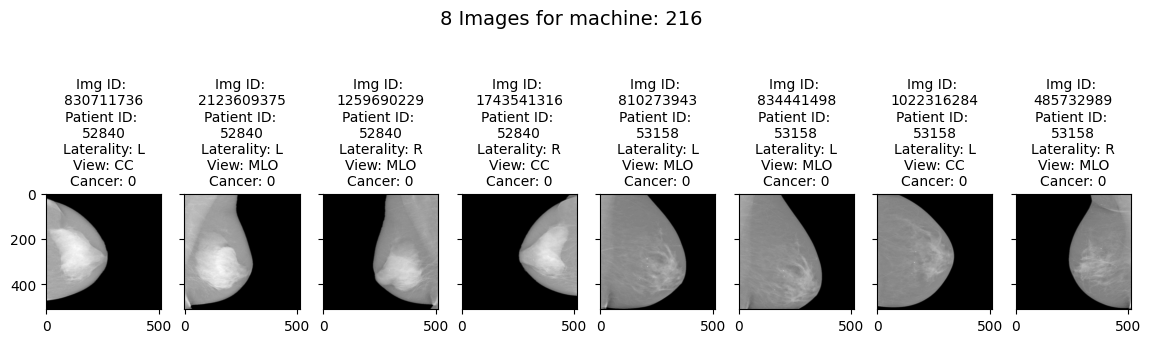

In [35]:
import random

selected_machine = 216
rand_index_density = random.randint(0, len(df_noimp_abc[df_noimp_abc["machine_id"] == selected_machine])-10)


df = pd.read_csv('../train.csv')
image_count_selected_patient = 8
selected_density_df = df_noimp_abc[df_noimp_abc["machine_id"] == selected_machine].iloc[rand_index_density : rand_index_density+image_count_selected_patient]


img_links_density = []
for index, row in selected_density_df.iterrows():
    img_file_name = str(row["patient_id"])+"_"+str(row["image_id"])+".png"
    # print('/images/'+img_file_name)
    img = np.asarray(Image.open('../images/'+img_file_name))
    img_links_density.append(img_file_name)



f, axarr = plt.subplots(1, image_count_selected_patient, 
                        sharey=True,
                        figsize=(14, 5))
f.suptitle(f'{image_count_selected_patient} Images for machine: {selected_machine}', fontsize=14)

counter_img_d = 0
for index, row in selected_density_df.iterrows():
    img = np.asarray(Image.open('../images/'+img_links_density[counter_img_d]))
    axarr[counter_img_d].imshow(img, 'gray')
    axarr[counter_img_d].set_title("Img ID: "+"\n"+str(row["image_id"])+"\n"+
                                   "Patient ID: "+"\n"+str(row["patient_id"])+"\n"+
                                "Laterality: "+str(row["laterality"])+"\n"+
                                "View: "+str(row["view"])+"\n"+
                                "Cancer: "+str(row["cancer"]),fontsize=10)
    counter_img_d+=1

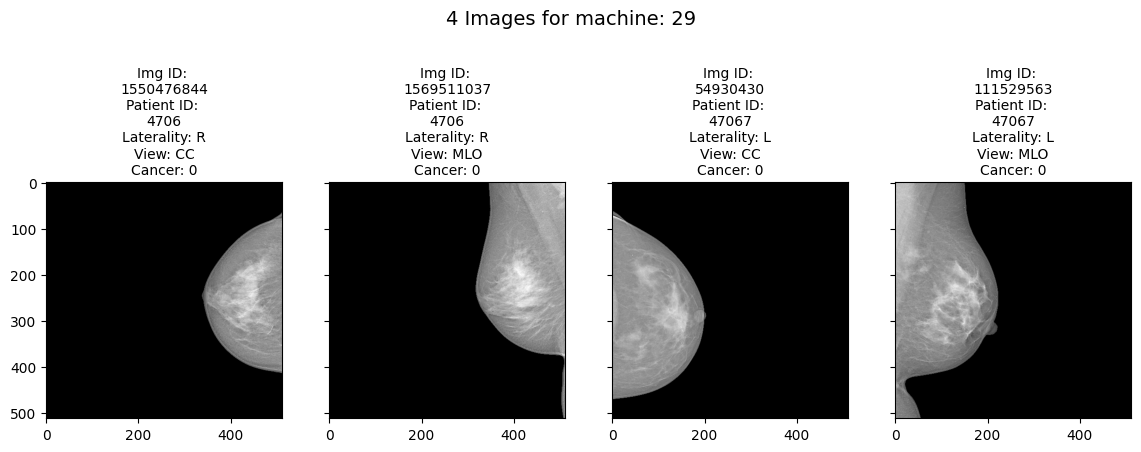

In [50]:
import random

selected_machine = 29
rand_index_density = random.randint(0, len(df_noimp_abc_0[df_noimp_abc_0["machine_id"] == selected_machine])-4)

image_count_selected_patient = 4
selected_density_df = df_noimp_abc_0[df_noimp_abc_0["machine_id"] == selected_machine].iloc[rand_index_density : rand_index_density+image_count_selected_patient]


img_links_density = []
for index, row in selected_density_df.iterrows():
    img_file_name = str(row["patient_id"])+"_"+str(row["image_id"])+".png"
    # print('/images/'+img_file_name)
    img = np.asarray(Image.open('../images/'+img_file_name))
    img_links_density.append(img_file_name)



f, axarr = plt.subplots(1, image_count_selected_patient, 
                        sharey=True,
                        figsize=(14, 6))
f.suptitle(f'{image_count_selected_patient} Images for machine: {selected_machine}', fontsize=14)

counter_img_d = 0
for index, row in selected_density_df.iterrows():
    img = np.asarray(Image.open('../images/'+img_links_density[counter_img_d]))
    axarr[counter_img_d].imshow(img, 'gray')
    axarr[counter_img_d].set_title("Img ID: "+"\n"+str(row["image_id"])+"\n"+
                                   "Patient ID: "+"\n"+str(row["patient_id"])+"\n"+
                                "Laterality: "+str(row["laterality"])+"\n"+
                                "View: "+str(row["view"])+"\n"+
                                "Cancer: "+str(row["cancer"]),fontsize=10)

    counter_img_d+=1

In [44]:
df = pd.read_csv('../train.csv')
df_noimp_abc = df[(df["implant"] == 0) & (df["density"] != "D")]
print("Total:",len(df_noimp_abc))
print("0:",len(df_noimp_abc[df_noimp_abc["cancer"]== 0]))
print("1:",len(df_noimp_abc[df_noimp_abc["cancer"]== 1]))

Total: 51754
0: 50634
1: 1120


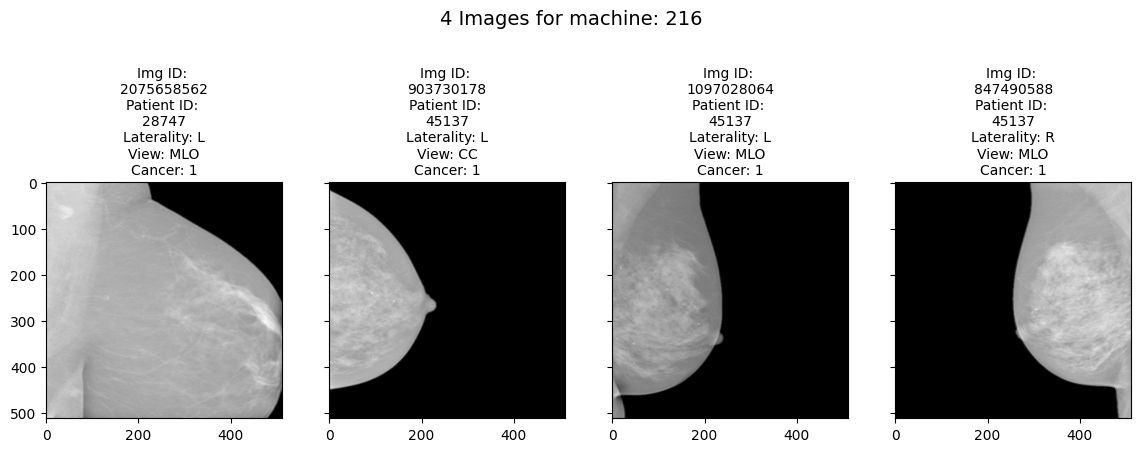

In [57]:
import random


selected_machine = 216
rand_index_density = random.randint(0, len(df_noimp_abc_1[df_noimp_abc_1["machine_id"] == selected_machine])-4)

image_count_selected_patient = 4
selected_density_df = df_noimp_abc_1[df_noimp_abc_1["machine_id"] == selected_machine].iloc[rand_index_density : rand_index_density+image_count_selected_patient]


img_links_density = []
for index, row in selected_density_df.iterrows():
    img_file_name = str(row["patient_id"])+"_"+str(row["image_id"])+".png"
    # print('/images/'+img_file_name)
    img = np.asarray(Image.open('../images/'+img_file_name))
    img_links_density.append(img_file_name)



f, axarr = plt.subplots(1, image_count_selected_patient, 
                        sharey=True,
                        figsize=(14, 6))
f.suptitle(f'{image_count_selected_patient} Images for machine: {selected_machine}', fontsize=14)

counter_img_d = 0
for index, row in selected_density_df.iterrows():
    img = np.asarray(Image.open('../images/'+img_links_density[counter_img_d]))
    axarr[counter_img_d].imshow(img, 'gray')
    axarr[counter_img_d].set_title("Img ID: "+"\n"+str(row["image_id"])+"\n"+
                                   "Patient ID: "+"\n"+str(row["patient_id"])+"\n"+
                                "Laterality: "+str(row["laterality"])+"\n"+
                                "View: "+str(row["view"])+"\n"+
                                "Cancer: "+str(row["cancer"]),fontsize=10)

    counter_img_d+=1